source: [Pythonではじめての統計～基本情報の確認から検定まで](https://codezine.jp/article/detail/11201)

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_raw = pd.read_csv('https://github.com/JeffSackmann/tennis_atp/blob/master/'
                 'atp_matches_2017.csv?raw=true')

In [6]:
df_raw

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2017-M020,Brisbane,Hard,32,A,20170102,300,105777,7.0,NaN,...,7.0,4.0,0.0,69.0,49.0,36.0,9.0,12.0,2.0,5.0
1,2017-M020,Brisbane,Hard,32,A,20170102,299,105777,7.0,NaN,...,0.0,4.0,3.0,61.0,28.0,24.0,16.0,10.0,2.0,4.0
2,2017-M020,Brisbane,Hard,32,A,20170102,298,105453,3.0,NaN,...,5.0,9.0,2.0,61.0,37.0,27.0,10.0,10.0,0.0,2.0
3,2017-M020,Brisbane,Hard,32,A,20170102,297,105683,1.0,NaN,...,7.0,4.0,0.0,84.0,61.0,39.0,14.0,14.0,2.0,4.0
4,2017-M020,Brisbane,Hard,32,A,20170102,296,105777,7.0,NaN,...,14.0,6.0,5.0,82.0,37.0,29.0,24.0,14.0,4.0,7.0
5,2017-M020,Brisbane,Hard,32,A,20170102,295,105453,3.0,NaN,...,0.0,1.0,2.0,47.0,28.0,15.0,5.0,7.0,3.0,8.0
6,2017-M020,Brisbane,Hard,32,A,20170102,294,104527,2.0,NaN,...,13.0,2.0,2.0,97.0,65.0,52.0,11.0,16.0,6.0,10.0
7,2017-M020,Brisbane,Hard,32,A,20170102,293,105683,1.0,NaN,...,3.0,0.0,1.0,44.0,29.0,17.0,6.0,8.0,2.0,6.0
8,2017-M020,Brisbane,Hard,32,A,20170102,292,104745,5.0,NaN,...,2.0,2.0,2.0,38.0,25.0,13.0,3.0,7.0,3.0,8.0
9,2017-M020,Brisbane,Hard,32,A,20170102,291,106233,4.0,NaN,...,4.0,11.0,1.0,58.0,35.0,34.0,9.0,10.0,3.0,4.0


In [13]:
player = 'Kei Nishikori'
df_nishikori = df_raw[(df_raw['winner_name'] == player) | (df_raw['loser_name'] == player)]

In [14]:
df_nishikori

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2017-M020,Brisbane,Hard,32,A,20170102,300,105777,7.0,NaN,...,7.0,4.0,0.0,69.0,49.0,36.0,9.0,12.0,2.0,5.0
2,2017-M020,Brisbane,Hard,32,A,20170102,298,105453,3.0,NaN,...,5.0,9.0,2.0,61.0,37.0,27.0,10.0,10.0,0.0,2.0
5,2017-M020,Brisbane,Hard,32,A,20170102,295,105453,3.0,NaN,...,0.0,1.0,2.0,47.0,28.0,15.0,5.0,7.0,3.0,8.0
12,2017-M020,Brisbane,Hard,32,A,20170102,288,105453,3.0,NaN,...,8.0,6.0,4.0,95.0,54.0,32.0,20.0,14.0,8.0,13.0
154,2017-580,Australian Open,Hard,128,G,20170116,115,105453,5.0,NaN,...,12.0,5.0,4.0,142.0,78.0,52.0,27.0,24.0,3.0,12.0
210,2017-580,Australian Open,Hard,128,G,20170116,171,105453,5.0,NaN,...,9.0,5.0,5.0,94.0,54.0,32.0,16.0,14.0,11.0,18.0
238,2017-580,Australian Open,Hard,128,G,20170116,199,105453,5.0,NaN,...,2.0,12.0,1.0,106.0,60.0,46.0,15.0,15.0,5.0,9.0
252,2017-580,Australian Open,Hard,128,G,20170116,213,103819,17.0,NaN,...,10.0,5.0,5.0,164.0,107.0,73.0,24.0,24.0,11.0,18.0
347,2017-0506,Buenos Aires,Clay,32,A,20170213,300,105238,NaN,NaN,...,3.0,2.0,1.0,78.0,49.0,34.0,17.0,11.0,7.0,8.0
348,2017-0506,Buenos Aires,Clay,32,A,20170213,299,105453,1.0,NaN,...,10.0,2.0,4.0,106.0,61.0,40.0,21.0,14.0,10.0,14.0


In [15]:
df_nishikori.columns.values

array(['tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank',
       'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced'], dtype=object)

In [16]:
df = df_nishikori[['winner_name', 'winner_ht', 'w_df', 'w_1stWon', 'w_2ndWon',
                'w_ace', 'l_ace', 'loser_name', 'loser_ht', 'l_df', 'l_1stWon', 'l_2ndWon', 'minutes']]

In [17]:
df.describe()

,winner_ht,w_df,w_1stWon,w_2ndWon,w_ace,l_ace,loser_ht,l_df,l_1stWon,l_2ndWon,minutes
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,38.000000,43.000000,43.000000,43.000000,44.000000
mean,181.023256,2.372093,40.093023,16.581395,4.116279,4.697674,182.815789,3.232558,34.860465,15.883721,120.659091
std,5.663115,2.081932,15.176445,6.932438,3.868119,3.628819,7.866643,2.533934,14.887805,7.955858,49.755656
min,178.000000,0.000000,17.000000,1.000000,0.000000,0.000000,170.000000,0.000000,6.000000,4.000000,0.000000
25%,178.000000,1.000000,29.000000,12.000000,2.000000,2.000000,178.000000,1.000000,22.500000,10.000000,81.750000
50%,178.000000,2.000000,37.000000,15.000000,3.000000,4.000000,180.500000,3.000000,32.000000,14.000000,118.500000
75%,181.500000,3.000000,47.500000,20.500000,5.000000,7.000000,188.000000,5.000000,45.000000,21.500000,155.250000
max,198.000000,8.000000,80.000000,35.000000,24.000000,14.000000,203.000000,12.000000,73.000000,34.000000,231.000000


In [18]:
df['win'] = df['winner_name'] == player

/Users/user/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df['points_total']  = df['w_1stWon'] + df['w_2ndWon']+df['l_1stWon']+ df['l_2ndWon']
df['points']  = df['win']*(df['w_1stWon'] + df['w_2ndWon'])+ ~df['win']*(df['l_1stWon']+ df['l_2ndWon'])

/Users/user/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/user/.pyenv/versions/3.7.0/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
points_total =df['points_total'] 
points_count =  df['points']
points = points_count/points_total
won_1st_count = df['win']*(df['w_1stWon'])+ ~df['win']*(df['l_1stWon'])
won_1st = won_1st_count/points_total

In [21]:
won_1st.head()

0      0.367347
2      0.420455
5      0.375000
12     0.401709
154    0.372222
dtype: float64

Text(0, 0.5, '% of won_1st')

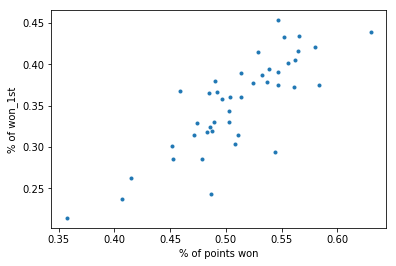

In [22]:
fig, ax = plt.subplots(1, 1)
ax.plot(points, won_1st, '.')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of won_1st')

In [23]:
df_bis = pd.DataFrame({'points': points,
                       'won_1st': won_1st}).dropna()

In [24]:
df_bis.corr()

,points,won_1st
points,1.000000,0.814995
won_1st,0.814995,1.000000


In [25]:
df_bis['result'] = (df_bis['points'] >df_bis['points'].median())
df_bis['manywon_1st'] = (df_bis['won_1st'] > df_bis['won_1st'].median())

In [26]:
crossed  = pd.crosstab(df_bis['result'], df_bis['manywon_1st'])
crossed

manywon_1st,False,True
result,,
False,19,3
True,3,18


In [27]:
st.chi2_contingency(crossed)

(19.54792240587695,
 9.810737324137886e-06,
 1,
 array([[11.25581395, 10.74418605],
        [10.74418605, 10.25581395]]))